In [20]:
import numpy as np
import pyFAI

# Q-calibration

In [1]:
!ls ../../../../hdf5/smalldata

cube			xppl1001021_Run0031.h5	xppl1001021_Run0045.h5
jungfrau		xppl1001021_Run0032.h5	xppl1001021_Run0046.h5
xppl1001021_Run0002.h5	xppl1001021_Run0033.h5	xppl1001021_Run0047.h5
xppl1001021_Run0003.h5	xppl1001021_Run0034.h5	xppl1001021_Run0048.h5
xppl1001021_Run0004.h5	xppl1001021_Run0035.h5	xppl1001021_Run0049.h5
xppl1001021_Run0005.h5	xppl1001021_Run0036.h5	xppl1001021_Run0050.h5
xppl1001021_Run0009.h5	xppl1001021_Run0037.h5	xppl1001021_Run0051.h5
xppl1001021_Run0010.h5	xppl1001021_Run0038.h5	xppl1001021_Run0052.h5
xppl1001021_Run0011.h5	xppl1001021_Run0039.h5	xppl1001021_Run0053.h5
xppl1001021_Run0012.h5	xppl1001021_Run0040.h5	xppl1001021_Run0054.h5
xppl1001021_Run0014.h5	xppl1001021_Run0041.h5	xppl1001021_Run0055.h5
xppl1001021_Run0015.h5	xppl1001021_Run0042.h5	xppl1001021_Run0056.h5
xppl1001021_Run0024.h5	xppl1001021_Run0043.h5	xppl1001021_Run0057.h5
xppl1001021_Run0029.h5	xppl1001021_Run0044.h5	xppl1001021_Run0058.h5


In [4]:
import h5py
from matplotlib import pylab as plt

In [8]:
def visit_func(name, node):
    """Return all groups and datasets name and shapes of h5 file called name
    Use it as in the following:
    with h5py.File(filename, 'a') as f: f.visititems(visit_func)
    """
    if isinstance(node, h5py.Group):
        print("group", node.name)
    elif isinstance(node, h5py.Dataset):
#         if (node.dtype == 'object') :
#             print (node.name, 'is an object Dataset')
#         else:
        print('\t', node.name, node.shape)
    else:
        print(node.name, 'is an unknown type')

In [21]:
with h5py.File("../../../../hdf5/smalldata/jungfrau/xppl1001021_Run0059.h5", "r") as f:
    # f.visititems(visit_func)
    # print(f['Sums/jungfrau1M_alcove'].keys())
    data = np.array(f['/Sums/jungfrau1M_alcove_calib_img'])
    # data = {}
    # for key in f['jungfrau1M_alcove'].keys():
    #     print('jungfrau1M_alcove/'+key)
    #     data['jungfrau1M_alcove/'+key] = np.array(f['jungfrau1M_alcove/'+key])
    # data = np.array(f['jungfrau1M_alcove/azav_azav'])

In [22]:
np.shape(data)

(1064, 1030)

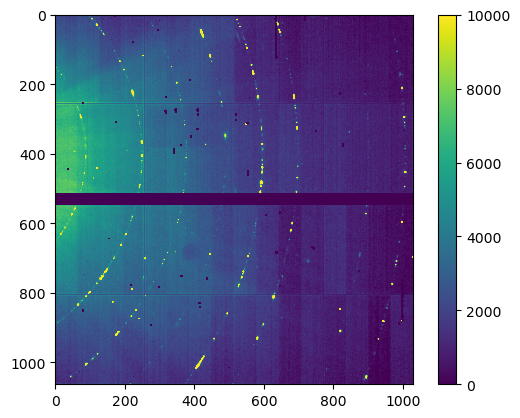

In [29]:
plt.figure()
plt.imshow(data, vmin=0, vmax=1e4)
plt.colorbar()

In [35]:
!ls ../../npys

4epix_Lab6_231103.poni	 det_img1_Sibeee.npy	  det_img4_Sibeee_new.npy
AhBh_asselmbles.npy	 det_img2.npy		  jungfrau.npy
det_img0.npy		 det_img2_Sibeee_new.npy  jungfrau_run29.npy
det_img0_Sibeee_new.npy  det_img2_Sibeee.npy	  jungfrau_run30.npy
det_img0_Sibeee.npy	 det_img3.npy		  jungfrau_run31.npy
det_img1.npy		 det_img3_Sibeee_new.npy  jungfrau_run59.npy
det_img1_Sibeee_new.npy  det_img3_Sibeee.npy	  Lab5_asselmbles.npy


/tmp/ipykernel_3479148/1633572392.py:3: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(img), vmin=-3, vmax=1)
/tmp/ipykernel_3479148/1633572392.py:3: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(img), vmin=-3, vmax=1)


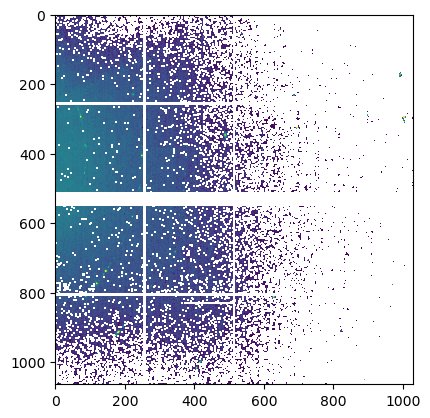

In [40]:
img = np.load('../../npys/jungfrau_run59.npy')
plt.figure()
plt.imshow(img, vmin=, vmax=1)

In [70]:
for key in data.keys():
    print(key, np.shape(data[key]))

jungfrau1M_alcove/azav_azav (1691, 1, 394)
jungfrau1M_alcove/pyfai_az (1691, 360)
jungfrau1M_alcove/pyfai_azav (1691, 360, 512)
jungfrau1M_alcove/pyfai_q (1691, 512)


In [75]:
# data['jungfrau1M_alcove/pyfai_q'][0,:]

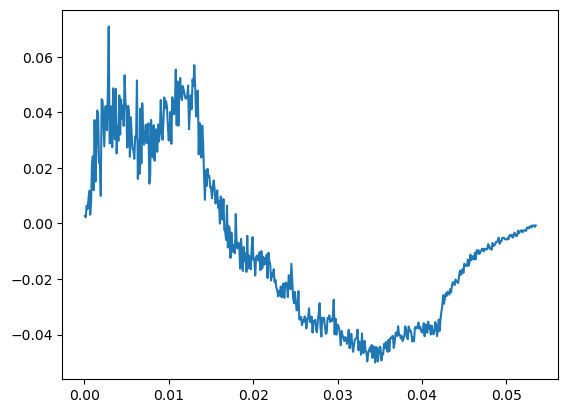

In [71]:
plt.figure()
plt.plot(data['jungfrau1M_alcove/pyfai_q'][0,:], np.mean(data['jungfrau1M_alcove/pyfai_azav'][0,:,:], axis=0))
plt.xlabel('q, (1/nm)')
plt.ylabel('I(q)')

In [26]:
def silver_behenate():
    '''
    Returns Silver Behenate peak positions in Angstrom
    http://gisaxs.com/index.php/Material:Silver_behenate
    '''
    q = [0.107625095, 0.215250189, 0.322875284, 0.430500378, 0.5380, 0.6456,0.7532,0.8608,0.9684,1.076,1.184,1.369,1.387]
    # There is a doublet at approximately: 1.369, 1.387 Å−1
    return q

Ag_Bh = silver_behenate()

Text(0, 0.5, 'I(q)')

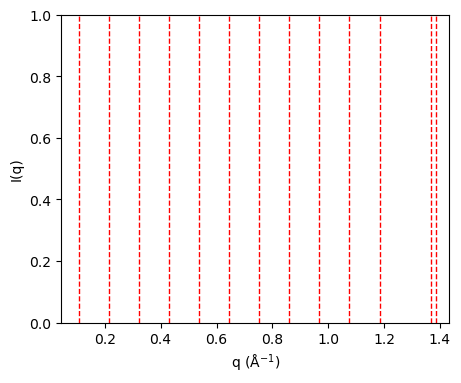

In [30]:
plt.figure(figsize=(5,4))
for q in Ag_Bh:
    plt.axvline(x=q, ls='--', c='r', lw=1)
    
plt.xlabel(r'q (Å$^{-1}$)')
plt.ylabel('I(q)')


 0
AxesSubplot(0.125,0.53;0.352273x0.35)

 1
AxesSubplot(0.547727,0.53;0.352273x0.35)

 2
AxesSubplot(0.125,0.11;0.352273x0.35)

 3
AxesSubplot(0.547727,0.11;0.352273x0.35)


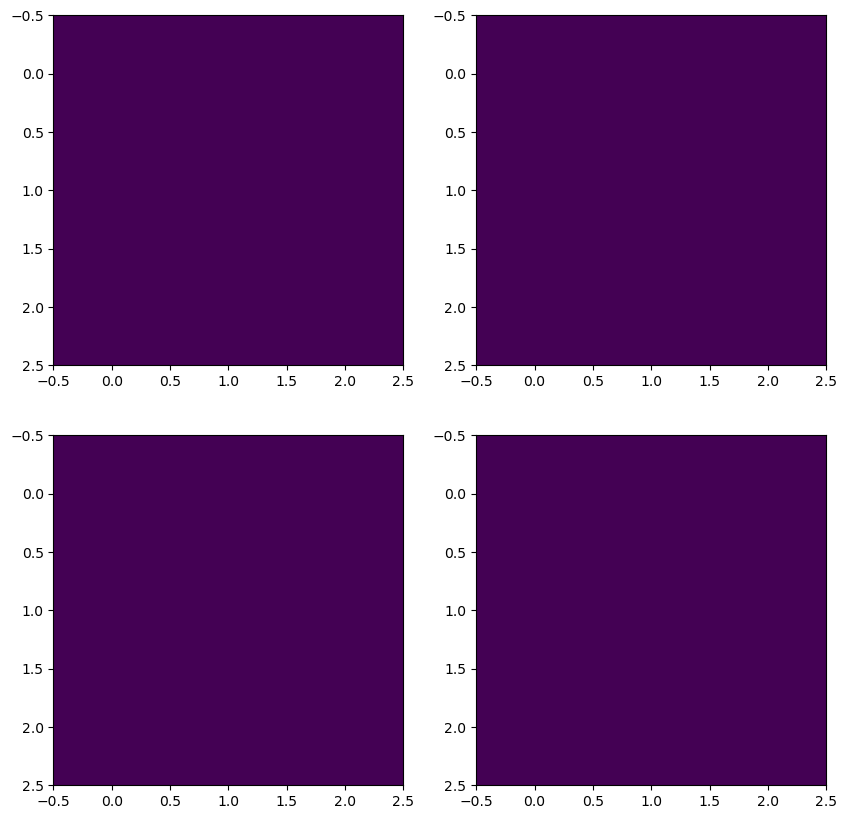

# Smalldata Jungfrau debugging

In [41]:
with h5py.File("../../../../hdf5/smalldata/jungfrau/xppl1001021_Run0070.h5", "r") as f:
    f.visititems(visit_func)
    # print(f['Sums/jungfrau1M_alcove'].keys())
    # data = np.array(f['/Sums/jungfrau1M_alcove_calib_img'])

group /Sums
	 /Sums/epix_alc1_calib (704, 768)
	 /Sums/epix_alc1_calib_dropped (704, 768)
	 /Sums/epix_alc1_calib_dropped_square (704, 768)
	 /Sums/epix_alc1_calib_img (709, 773)
	 /Sums/epix_alc2_calib (704, 768)
	 /Sums/epix_alc2_calib_dropped (704, 768)
	 /Sums/epix_alc2_calib_dropped_square (704, 768)
	 /Sums/epix_alc2_calib_img (709, 773)
	 /Sums/epix_alc3_calib (704, 768)
	 /Sums/epix_alc3_calib_dropped (704, 768)
	 /Sums/epix_alc3_calib_dropped_square (704, 768)
	 /Sums/epix_alc3_calib_img (709, 773)
	 /Sums/epix_alc4_calib (704, 768)
	 /Sums/epix_alc4_calib_dropped (704, 768)
	 /Sums/epix_alc4_calib_dropped_square (704, 768)
	 /Sums/epix_alc4_calib_img (709, 773)
	 /Sums/jungfrau1M_alcove_calib (2, 512, 1024)
	 /Sums/jungfrau1M_alcove_calib_dropped (2, 512, 1024)
	 /Sums/jungfrau1M_alcove_calib_dropped_square (2, 512, 1024)
	 /Sums/jungfrau1M_alcove_calib_img (1064, 1030)
group /UserDataCfg
group /UserDataCfg/EOrbits
	 /UserDataCfg/EOrbits/detname (1,)
	 /UserDataCfg/EOrbits/na